In [107]:
# !pip install pandas
import pandas as pd
import os
os.chdir('C:\\Users\\bpanda8\\OneDrive - DXC Production\\Desktop\\Diageo')
import numpy as np
import statsmodels.tsa.arima.model as stats
from scipy import stats
from datetime import date
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
# !pip install pmdarima
from pmdarima.arima import auto_arima

sales_data = pd.read_excel('store.xls', sheet_name = 'Orders')
sales_data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


Find the best selling Category


In [53]:
def max_sales(df):
    s = df.groupby(['Category'])['Sales'].sum().to_frame().rename(columns={"Category": "sales"}).reset_index()
    return [s.loc[s['Sales'] >= s['Sales'].max(), 'Category']]
max_sales(sales_data)

[2    Technology
 Name: Category, dtype: object]

Find Most profitable Category

In [55]:
def max_proft(df):
    s = df.groupby(['Category'])['Profit'].sum().to_frame().rename(columns={"Category": "Profit"}).reset_index()
    return [s.loc[s['Profit'] >= s['Profit'].max(), 'Category']]
max_proft(sales_data)

[2    Technology
 Name: Category, dtype: object]

Find top Selling Sub-Categorys

In [73]:
sales_data.groupby(["Sub-Category"]).sum().sort_values("Sales", ascending=False).reset_index().head(3)

,Sub-Category,Row ID,Postal Code,Sales,Quantity,Discount,Profit
0,Phones,4395985,47897175,330007.054,3289,137.4,44515.7306
1,Chairs,3121503,34936229,328449.103,2356,105.0,26590.1663
2,Storage,4126649,46248720,223843.608,3158,63.2,21278.8264


Find Most Profitable Sub-Categorys

In [74]:
sales_data.groupby(["Sub-Category"]).sum().sort_values("Profit", ascending=False).reset_index().head(3)

,Sub-Category,Row ID,Postal Code,Sales,Quantity,Discount,Profit
0,Copiers,355661,3873477,149528.030,234,11.0,55617.8249
1,Phones,4395985,47897175,330007.054,3289,137.4,44515.7306
2,Accessories,3928080,44468434,167380.318,2976,60.8,41936.6357


Which is the Top Selling Sub-Category?

In [288]:
def max_sales_sub_cat(df):
    s = df.groupby(['Sub-Category'])['Sales'].sum().to_frame().rename(columns={"Sub-Category": "sales"}).reset_index()
    return [s.loc[s['Sales'] >= s['Sales'].max(), 'Sub-Category']]
max_sales_sub_cat(sales_data)

[13    Phones
 Name: Sub-Category, dtype: object]

Which Customer Segment is Most Profitable?

In [76]:
def prftbl_cust_seg(df):
    s = df.groupby(['Segment'])['Profit'].sum().to_frame().rename(columns={"Segment": "Profit"}).reset_index()
    return [s.loc[s['Profit'] >= s['Profit'].max(), 'Segment']]
prftbl_cust_seg(sales_data)

[0    Consumer
 Name: Segment, dtype: object]

Which is the Preferred Ship Mode?

In [83]:
def pref_ship_mode(df):
    s = df.groupby(['Ship Mode']).size().reset_index(name='counts')
    return [s.loc[s['counts'] >= s['counts'].max(), 'Ship Mode']]
pref_ship_mode(sales_data)

[3    Standard Class
 Name: Ship Mode, dtype: object]

Which Region is the Most Profitable?

In [84]:
def prof_region(df):
    s = df.groupby(['Region']).size().reset_index(name='Profit')
    return [s.loc[s['Profit'] >= s['Profit'].max(), 'Region']]
prof_region(sales_data)

[3    West
 Name: Region, dtype: object]

Which City has the Highest Number of Sales?

In [86]:
def city_sales_cnt(df):
    s = df.groupby(['City']).size().reset_index(name='counts')
    return [s.loc[s['counts'] >= s['counts'].max(), 'City']]
city_sales_cnt(sales_data)

[329    New York City
 Name: City, dtype: object]

In [90]:
# !pip install matplotlib
# !pip install seaborn

Check for any blank/null values

In [91]:
sales_data.isnull()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9990,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9991,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9992,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Check and delete duplicate records 

In [97]:
sd = sales_data.drop('Row ID', 1)
print(sd.info())
print(sd[sd.duplicated()])

## Droping the duplicate row
clean_data = sd.drop_duplicates()
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9994 non-null   object        
 1   Order Date     9994 non-null   datetime64[ns]
 2   Ship Date      9994 non-null   datetime64[ns]
 3   Ship Mode      9994 non-null   object        
 4   Customer ID    9994 non-null   object        
 5   Customer Name  9994 non-null   object        
 6   Segment        9994 non-null   object        
 7   Country        9994 non-null   object        
 8   City           9994 non-null   object        
 9   State          9994 non-null   object        
 10  Postal Code    9994 non-null   int64         
 11  Region         9994 non-null   object        
 12  Product ID     9994 non-null   object        
 13  Category       9994 non-null   object        
 14  Sub-Category   9994 non-null   object        
 15  Product Name   9994 n

C:\python\interview\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [98]:
clean_data.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023851,0.012731,0.058471,-0.029968
Sales,-0.023851,1.000000,0.200808,-0.028197,0.479067
Quantity,0.012731,0.200808,1.000000,0.008680,0.066241
Discount,0.058471,-0.028197,0.008680,1.000000,-0.219481
Profit,-0.029968,0.479067,0.066241,-0.219481,1.000000


1. Sales and Profit are positively correlated
2. Discount and Profit are negatively corelated 
3. For others the correlation coeffficient is very small
4. Postal Code is a qualitative variable though represented as number

In [101]:
## Checking the statistical significance of correlation

pearson_coef, p_value = stats.pearsonr(clean_data["Sales"], clean_data["Profit"]) #define the columns to perform calculations on
print("Pearson Correlation Coefficient: ", pearson_coef, "and a P-value of:", p_value) # Results 

pearson_coef, p_value = stats.pearsonr(clean_data["Discount"], clean_data["Profit"]) 
print("Pearson Correlation Coefficient: ", pearson_coef, "and a P-value of:", p_value) 

Pearson Correlation Coefficient:  0.4790666754131718 and a P-value of: 0.0
Pearson Correlation Coefficient:  -0.21948100082958208 and a P-value of: 2.811561025825647e-109


In [112]:
cat_cols = ['Ship Mode','Segment','Region','Category','Sub-Category']
df_dummies = pd.get_dummies(clean_data[cat_cols])
num_cols = ['Sales','Quantity','Discount','Profit']
num_df = clean_data[num_cols]

df_new = pd.concat([df_dummies, num_df], axis=1)

x = df_new.values
# correlation_matrix = np.corrcoef(x.T)
cor = df_new.corr()
# corr = df.corr()
cor.style.background_gradient(cmap='coolwarm')
# print(correlation_matrix)

,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Consumer,Segment_Corporate,Segment_Home Office,Region_Central,Region_East,Region_South,Region_West,Category_Furniture,Category_Office Supplies,Category_Technology,Sub-Category_Accessories,Sub-Category_Appliances,Sub-Category_Art,Sub-Category_Binders,Sub-Category_Bookcases,Sub-Category_Chairs,Sub-Category_Copiers,Sub-Category_Envelopes,Sub-Category_Fasteners,Sub-Category_Furnishings,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables,Sales,Quantity,Discount,Profit
Ship Mode_First Class,1.000000,-0.102236,-0.209670,-0.519233,-0.016615,0.012197,0.007054,-0.038424,0.031840,-0.011535,0.013093,0.000485,-0.009889,0.011954,0.009042,0.005628,-0.010765,0.003548,0.025832,-0.011308,0.005175,-0.012497,-0.006465,-0.001215,0.005888,0.013782,0.004956,0.001146,-0.011163,-0.008614,-0.003307,-0.000928,-0.016905,0.017398,0.005788
Ship Mode_Same Day,-0.102236,1.000000,-0.117842,-0.291827,0.030864,-0.048163,0.017495,-0.006508,0.000293,-0.006022,0.010363,0.004107,-0.001300,-0.002687,-0.001835,-0.004861,-0.011826,-0.010756,-0.015933,0.010146,0.007008,0.000556,0.006690,-0.000002,0.002877,0.015526,0.008416,-0.009779,0.009563,0.002184,0.009206,0.002517,-0.019411,-0.004406,0.000620
Ship Mode_Second Class,-0.209670,-0.117842,1.000000,-0.598490,0.004878,0.011668,-0.020365,0.007695,-0.013512,0.009388,-0.001311,0.008885,-0.010785,0.004237,0.010543,-0.014026,0.000065,-0.023510,0.006133,0.014822,0.005426,0.005721,-0.009080,-0.001947,-0.011936,-0.019866,0.016423,0.001748,0.005754,0.011140,-0.001566,0.004919,0.005899,-0.041181,0.001835
Ship Mode_Standard Class,-0.519233,-0.291827,-0.598490,1.000000,-0.005978,0.003867,0.003164,0.025066,-0.012654,0.003692,-0.013364,-0.009427,0.016583,-0.010973,-0.014315,0.009428,0.013333,0.021338,-0.016592,-0.008334,-0.011426,0.004319,0.008994,0.002467,0.003974,-0.001279,-0.020792,0.002266,-0.000852,-0.003664,-0.000558,-0.004451,0.016647,0.022477,-0.006026
Segment_Consumer,-0.016615,0.030864,0.004878,-0.005978,1.000000,-0.684239,-0.484362,0.002506,-0.004399,-0.001919,0.003501,0.005750,-0.001346,-0.004360,0.004055,0.001833,0.010731,-0.006210,0.016851,0.007504,-0.000788,-0.003746,0.001754,-0.002128,-0.000091,-0.005142,-0.010869,-0.007601,0.007579,0.001909,-0.007644,-0.010208,-0.013647,0.009834,-0.012534
Segment_Corporate,0.012197,-0.048163,0.011668,0.003867,-0.684239,1.000000,-0.306584,-0.014980,0.008016,0.012072,-0.003728,0.002831,-0.000502,-0.002349,-0.005877,0.014644,-0.018157,0.007719,-0.007157,0.001665,-0.001459,0.010022,-0.009838,-0.000901,-0.009311,0.000502,-0.003820,0.002552,0.003389,0.005712,0.011893,0.004193,0.015959,0.006503,0.005045
Segment_Home Office,0.007054,0.017495,-0.020365,0.003164,-0.484362,-0.306584,1.000000,0.014700,-0.003875,-0.011978,-0.000098,-0.010902,0.002359,0.008509,0.001758,-0.019961,0.007776,-0.001156,-0.013408,-0.011792,0.002779,-0.007133,0.009513,0.003858,0.011289,0.006110,0.018770,0.006859,-0.013958,-0.009345,-0.004291,0.008294,-0.001332,-0.020638,0.010308
Region_Central,-0.038424,-0.006508,0.007695,0.025066,0.002506,-0.014980,0.014700,1.000000,-0.347367,-0.242072,-0.377981,-0.006850,0.010255,-0.005712,0.002517,0.016486,-0.007910,0.007883,-0.004762,0.010641,0.000555,-0.000069,0.007405,-0.014062,-0.010896,-0.012735,0.001740,-0.005542,0.011350,-0.014169,-0.002905,-0.012433,-0.002512,0.224361,-0.027177
Region_East,0.031840,0.000293,-0.013512,-0.012654,-0.004399,0.008016,-0.003875,-0.347367,1.000000,-0.277638,-0.433517,-0.002162,-0.002177,0.005021,-0.012265,-0.007111,0.000999,0.003762,0.007488,-0.007834,0.001690,0.002304,-0.001252,0.007799,0.003901,0.008806,-0.007936,0.014582,0.000777,0.003034,-0.013725,0.008576,-0.017280,-0.033257,0.009404
Region_South,-0.011535,-0.006022,0.009388,0.003692,-0.001919,0.012072,-0.011978,-0.242072,-0.277638,1.000000,-0.302107,-0.007758,0.010047,-0.004493,0.002398,0.007025,0.012994,-0.0

In [296]:
furniture_data = clean_data[(clean_data == 'Furniture').any(axis=1)]
furniture_ts_data = furniture_data[['Order Date','Sales']]

## Create a period column with Month and year only, to groupby sales by month
furniture_ts_data['year'] = pd.DatetimeIndex(furniture_ts_data['Order Date']).year
furniture_ts_data['month'] = pd.DatetimeIndex(furniture_ts_data['Order Date']).month
period = []
for y, m in zip(furniture_ts_data.year, furniture_ts_data.month):
    period.append(date(y, m, 1))
furniture_ts_data['period'] = period

## Groupded the sales per month
s = furniture_ts_data.groupby(['period'])['Sales'].sum().to_frame().rename(columns={"Order_period": "Sales"}).reset_index()


C:\python\interview\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\python\interview\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\python\interview\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

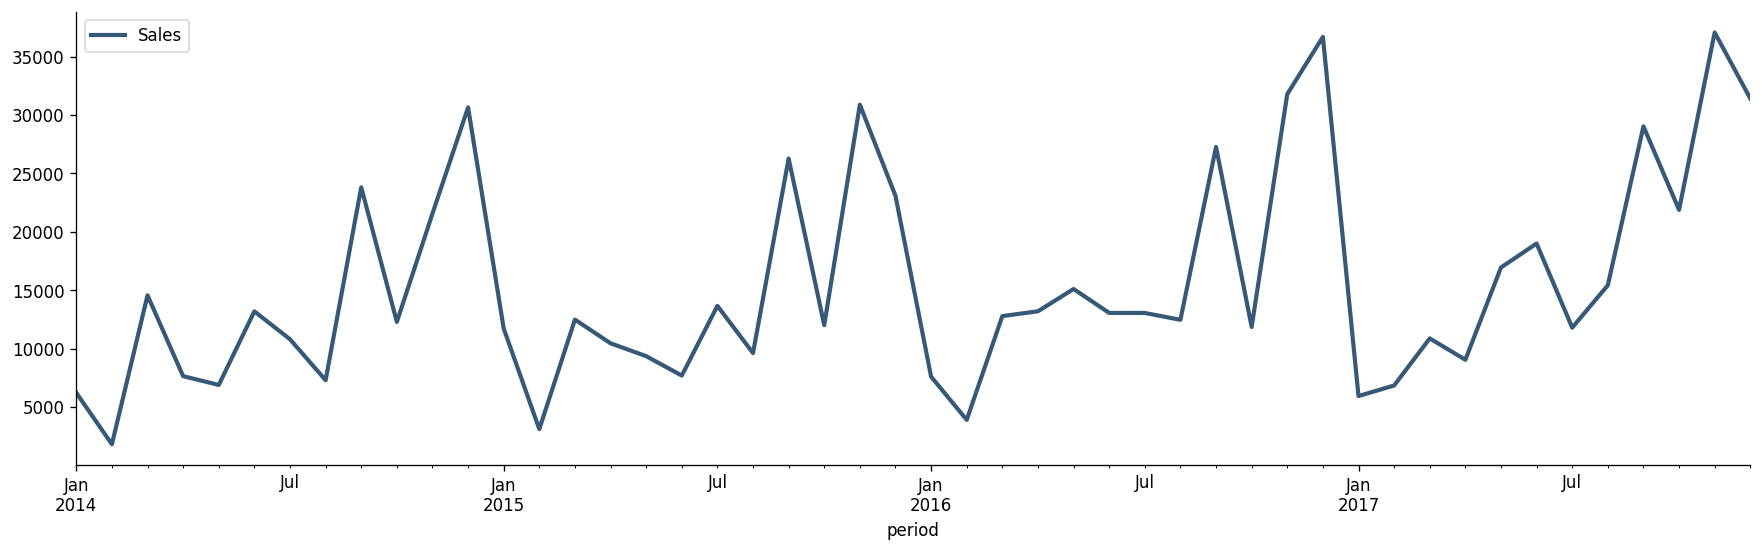

In [308]:
## Only sales and time index
s.index = pd.to_datetime(s['period'])
s1 = s.drop(['period'], axis = 1)
s1.head()

from matplotlib import pyplot
s1.plot()
pyplot.show()

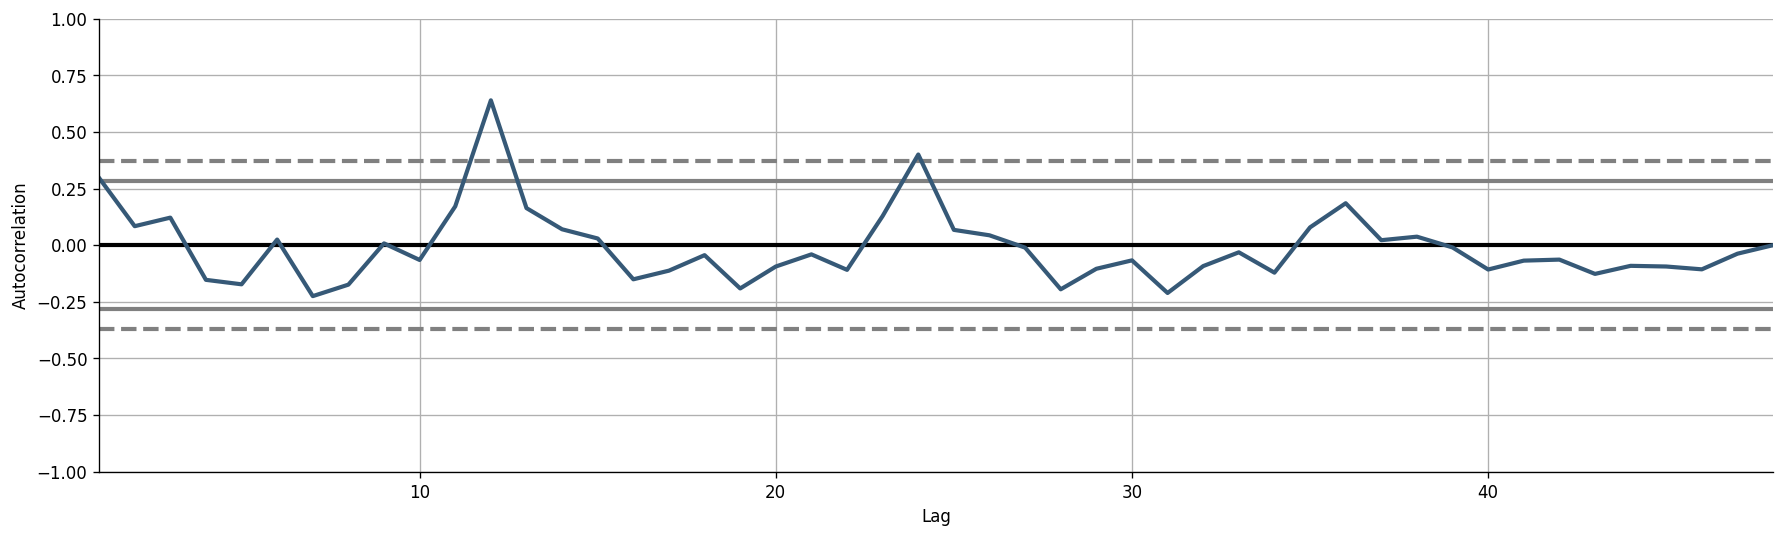

In [309]:
autocorrelation_plot(s1)
pyplot.show()

In [322]:
model = ARIMA(s1, order=(2,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   48
Model:                 ARIMA(2, 1, 0)   Log Likelihood                -495.158
Date:                Sat, 22 Jan 2022   AIC                            996.316
Time:                        13:19:49   BIC                           1001.866
Sample:                    01-01-2014   HQIC                           998.404
                         - 12-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5226      0.119     -4.408      0.000      -0.755      -0.290
ar.L2         -0.3142      0.117     -2.688      0.007      -0.543      -0.085
sigma2      8.281e+07   2.14e-10   3.87e+17      0.0

C:\python\interview\lib\site-packages\statsmodels\tsa\base\tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\python\interview\lib\site-packages\statsmodels\tsa\base\tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\python\interview\lib\site-packages\statsmodels\tsa\base\tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [328]:
## Fuller test statistics to check stationarity
result = adfuller(s1)
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -4.697056243064943
p-value: 8.52308566986199e-05
Critical Values:
	1%: -3.5778480370438146
	5%: -2.925338105429433
	10%: -2.6007735310095064


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=467.716, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=467.242, Time=0.07 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=467.288, Time=0.13 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=468.907, Time=0.03 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=469.206, Time=0.25 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=469.207, Time=0.19 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=467.399, Time=0.13 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=471.206, Time=0.34 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=465.993, Time=0.19 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=468.271, Time=0.20 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=467.991, Time=0.29 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=466.199, Time=0.06 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=470.145, Time=0.26 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=467.098, Time=0.16 sec
 ARIMA(1,1,1)(1,1,0)[12]         

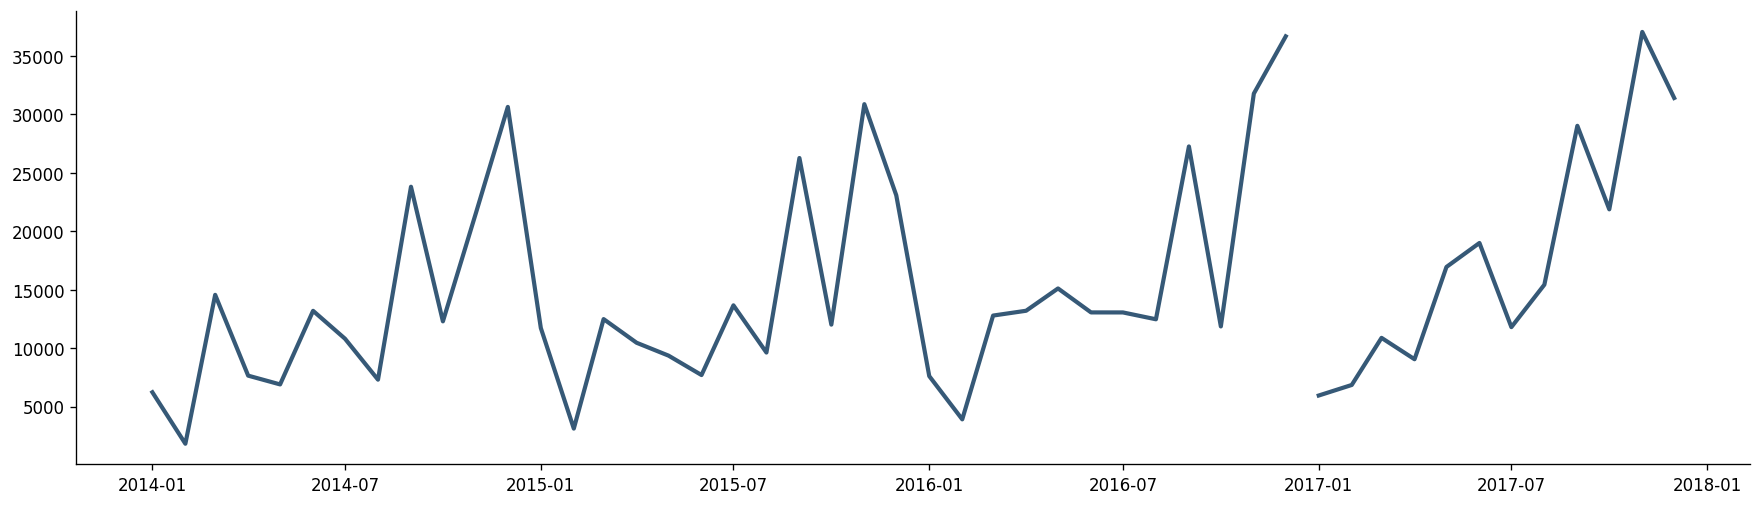

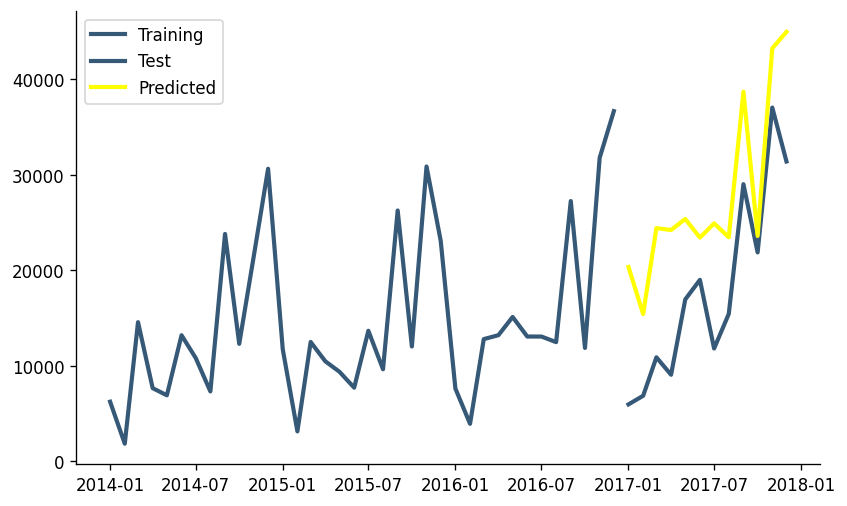

In [353]:
train=s1[:36]
test=s1[-12:]
plt.plot(train)
plt.plot(test)

model=auto_arima(train,start_p=0,d=1,start_q=0,
          max_p=5,max_d=5,max_q=5, start_P=0,
          D=1, start_Q=0, max_P=5,max_D=5,
          max_Q=5, m=12, seasonal=True,
          error_action='warn',trace=True,
          supress_warnings=True,stepwise=True,
          random_state=20,n_fits=50)

prediction = pd.DataFrame(model.predict(n_periods = 12),index=test.index)
prediction.columns = ['predicted_sales']
plt.figure(figsize=(8,5))
plt.plot(train,label="Training")
plt.plot(test,label="Test")
plt.plot(prediction,"yellow",label="Predicted")
plt.legend(loc = 'upper left')
plt.savefig('SecondPrection.jpg')
plt.show()